In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/mlb-hitting-and-pitching-stats-through-the-years/baseball_pitcher.csv
/kaggle/input/mlb-hitting-and-pitching-stats-through-the-years/baseball_hitting.csv


# Data Loading + Exploration

In [2]:
hdf = pd.read_csv('/kaggle/input/mlb-hitting-and-pitching-stats-through-the-years/baseball_hitting.csv')

Find the dtypes for each column. The majority of columns in this dataset should be float64, int, or some other numeric datatype.

In [3]:
hdf.dtypes

Player name               object
position                  object
Games                    float64
At-bat                   float64
Runs                     float64
Hits                     float64
Double (2B)              float64
third baseman            float64
home run                 float64
run batted in            float64
a walk                   float64
Strikeouts                object
stolen base              float64
Caught stealing           object
AVG                      float64
On-base Percentage       float64
Slugging Percentage      float64
On-base Plus Slugging    float64
dtype: object

In [4]:
# Convert Strikeouts and Caught Stealing to float64
hdf['Strikeouts'] = pd.to_numeric(hdf['Strikeouts'], errors='coerce')
hdf['Caught stealing'] = pd.to_numeric(hdf['Caught stealing'], errors='coerce')

Here we will calculate a few efficiency metrics to describe hitting efficiency per at bat for 
each hit type

* single
* double
* triple
* home run

We will also include other on base or base movement events including

* walks
* runs batted in

In [5]:
# Use loc to replace atbat in place. This allows us to use a pandas query
hdf.loc[:, 'at_bat'] = hdf['At-bat']

# Create a new dataframe filtered to players who have > 1000 at bats
hdf1 = hdf.query('at_bat > 1000.0').copy()

In [6]:
# Home runs per at bat
hdf1['hr_per_ab'] = hdf1['home run'] / hdf1['at_bat']

# Singles per at bat
# Singles have to be calculated by subtracting other kinds of hits from total hits
hdf1['singles'] = hdf1['Hits'] - hdf1['Double (2B)'] - hdf1['third baseman'] - hdf1['home run']
hdf1['singles_per_ab'] = hdf1['singles']/hdf1['at_bat']

# Doubles per at bat
hdf1['doubles_per_ab'] = hdf1['Double (2B)']/hdf1['at_bat']

# Triples per at bat
hdf1['triples_per_ab'] = hdf1['third baseman']/hdf1['at_bat']

# Walks per at bat
hdf1['walks_per_ab'] = hdf1['a walk']/hdf1['at_bat']

# RBIs per at bat
hdf1['rbi_per_ab'] = hdf1['run batted in']/hdf1['at_bat']

# Strikeouts per at bat
hdf1['strikeouts_per_ab'] = hdf1['Strikeouts']/hdf1['at_bat']

# Offensive output per at bat
# This is an attempt at an offensive output per at bat metric. It will simply add the per at bat 
# metrics
hdf1['output_per_ab'] = hdf1['hr_per_ab'] + hdf1['singles_per_ab'] + hdf1['doubles_per_ab'] + \
                        hdf1['triples_per_ab'] + hdf1['walks_per_ab'] + hdf1['rbi_per_ab']

Now we're going to create a dataset for our visualizations isolating the metrics we just created and their corresponding raw numbers.

In [7]:
hdf2 = hdf1[['Player name', 'position', 'Games', 'at_bat',
             'singles', 'Double (2B)', 'third baseman', 'home run',
             'run batted in']].copy()

hdf3 = hdf1[['Player name', 'position', 'Games', 'at_bat',
            'hr_per_ab', 'singles_per_ab', 'doubles_per_ab', 
             'triples_per_ab', 'walks_per_ab', 'rbi_per_ab', 'strikeouts_per_ab', 
             'output_per_ab']].sort_values('hr_per_ab', ascending=False).reset_index(drop=True)

# Visualizations

I'll be using Seaborn to build visualizations. Here we just want to take a look at any trends we see in the per at bat metrics. 

The ones we'll be focusing on are:
* Highest rated individual players
* Highest rated position group

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

Since we're going to be doing quite a bit of plotting with our per at bat metrics, I'm going to create a dataframe with an descending order of each of the metrics.We also need to reset the index for each one. 

This will ensure we get a nice descending order for all our charts

In [9]:
hdf3 = hdf1[['Player name', 'position', 'Games', 'at_bat',
            'hr_per_ab', 'singles_per_ab', 'doubles_per_ab', 
             'triples_per_ab', 'walks_per_ab', 'rbi_per_ab', 'strikeouts_per_ab', 
             'output_per_ab']].sort_values('hr_per_ab', ascending=False).reset_index(drop=True)

hdf4 = hdf3.sort_values('singles_per_ab', ascending=False).reset_index(drop=True)
hdf5 = hdf3.sort_values('doubles_per_ab', ascending=False).reset_index(drop=True)
hdf6 = hdf3.sort_values('triples_per_ab', ascending=False).reset_index(drop=True)
hdf7 = hdf3.sort_values('hr_per_ab', ascending=False).reset_index(drop=True)
hdf8 = hdf3.sort_values('walks_per_ab', ascending=False).reset_index(drop=True)
hdf9 = hdf3.sort_values('rbi_per_ab', ascending=False).reset_index(drop=True)

hdf4.head()

,Player name,position,Games,at_bat,hr_per_ab,singles_per_ab,doubles_per_ab,triples_per_ab,walks_per_ab,rbi_per_ab,strikeouts_per_ab,output_per_ab
0,W Keeler,RF,1160.0,8591.0,0.003841,0.292515,0.028053,0.016878,0.060994,0.094285,0.004190,0.496566
1,B Hamilton,CF,102.0,6269.0,0.006381,0.284256,0.038603,0.015154,0.189344,0.117882,0.034774,0.651619
2,B Hamilton,CF,102.0,6269.0,0.006381,0.284256,0.038603,0.015154,0.189344,0.117882,0.034774,0.651619
3,J Burkett,LF,707.0,8421.0,0.008906,0.269920,0.038000,0.021613,0.122195,0.113051,0.027313,0.573685
4,T Cobb,CF,3034.0,11429.0,0.010237,0.267215,0.063260,0.025987,0.109283,0.169569,0.031236,0.645551


Let's take a look at a histogram to get a better idea of the shape of the data

<AxesSubplot: xlabel='output_per_ab', ylabel='Count'>

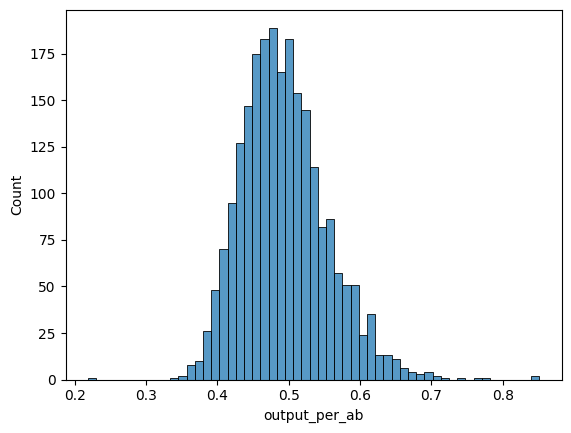

In [10]:
sns.histplot(data=hdf3, x='output_per_ab')

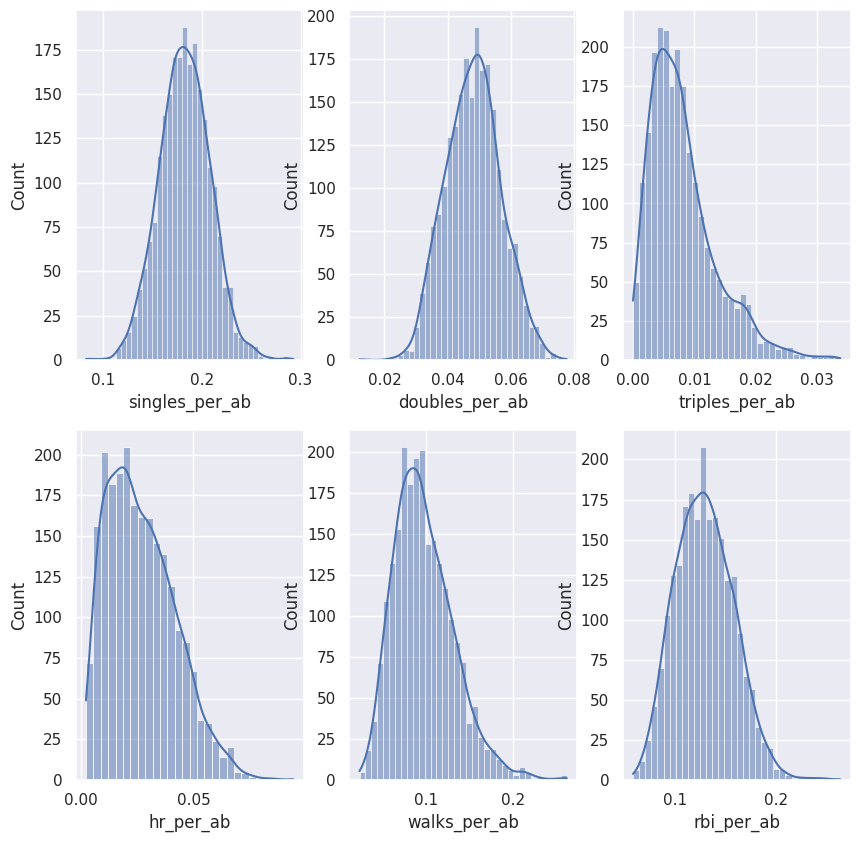

In [11]:
sns.set_theme(style='darkgrid')
fig, axs = plt.subplots(2, 3, figsize=(10, 10))

sns.histplot(data=hdf3, x="singles_per_ab", kde=True, ax=axs[0, 0])
sns.histplot(data=hdf3, x="doubles_per_ab", kde=True, ax=axs[0, 1])
sns.histplot(data=hdf3, x="triples_per_ab", kde=True, ax=axs[0, 2])
sns.histplot(data=hdf3, x="walks_per_ab", kde=True, ax=axs[1, 1])
sns.histplot(data=hdf3, x="rbi_per_ab", kde=True, ax=axs[1, 2])
sns.histplot(data=hdf3, x="hr_per_ab", kde=True, ax=axs[1, 0])

plt.show()

**Top 25 players by our output metric**

<AxesSubplot: xlabel='output_per_ab', ylabel='Player name'>

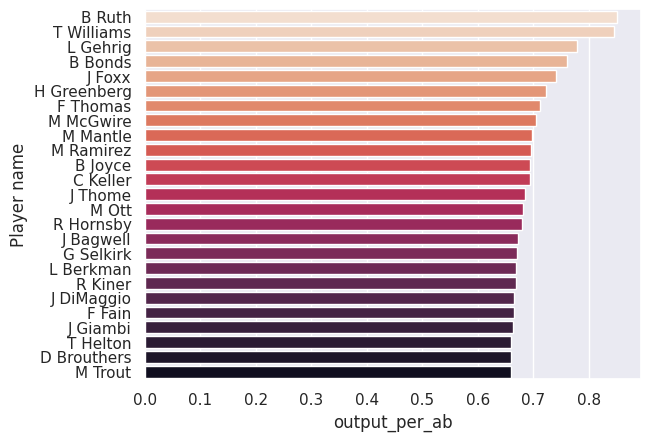

In [12]:
sns.barplot(data=hdf3.nlargest(25, 'output_per_ab'), x='output_per_ab', y='Player name', 
           errorbar=None, orient="h", palette='rocket_r')

Lots of previous generation players here. 

A point of further explation would be to compare this to the average ERA during their era 

**Output Stacked Bar**

**Top 25 Players in home runs per at bat**

<AxesSubplot: xlabel='hr_per_ab', ylabel='Player name'>

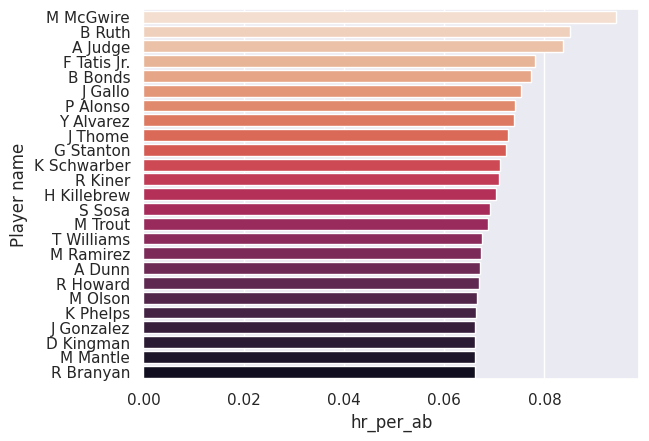

In [13]:
sns.barplot(data=hdf3.nlargest(25, 'hr_per_ab'), x='hr_per_ab', y='Player name', 
           errorbar=None, orient="h", palette='rocket_r')

Total output favored players from previous eras, but home runs per at bat sees some stars of the last 15 years

**Top 25 Players in singles per at bat**

<AxesSubplot: xlabel='singles_per_ab', ylabel='Player name'>

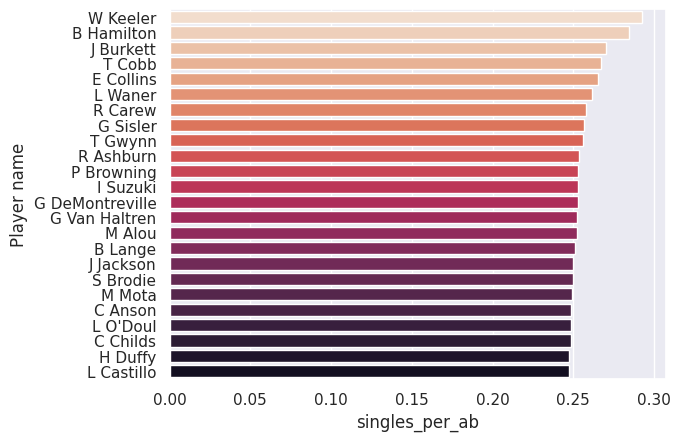

In [14]:
sns.barplot(data=hdf4.nlargest(25, 'singles_per_ab'), x='singles_per_ab', y='Player name', 
           errorbar=None, orient="h", palette='rocket_r')

**Top 25 Players in doubles per at bat**

<AxesSubplot: xlabel='doubles_per_ab', ylabel='Player name'>

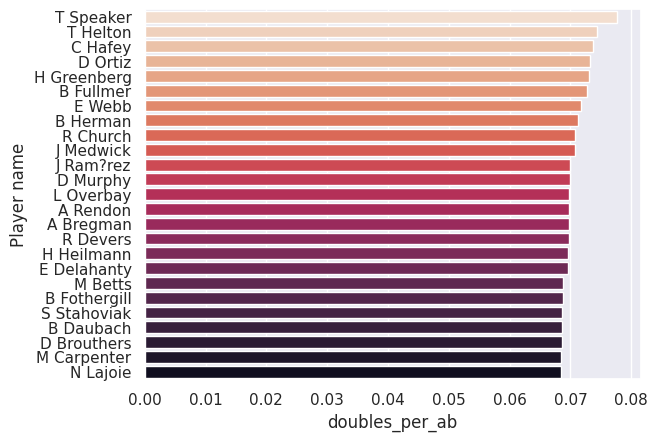

In [15]:
sns.barplot(data=hdf5.nlargest(25, 'doubles_per_ab'), x='doubles_per_ab', y='Player name', 
           errorbar=None, orient="h", palette='rocket_r')

**Top 25 Players in triples per at bat**

<AxesSubplot: xlabel='triples_per_ab', ylabel='Player name'>

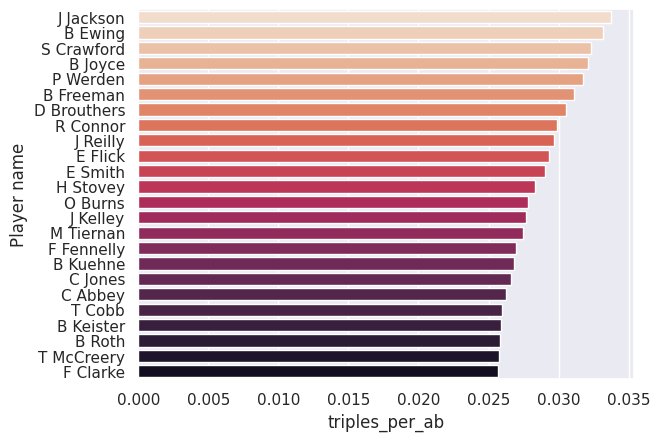

In [16]:
sns.barplot(data=hdf6.nlargest(25, 'triples_per_ab'), x='triples_per_ab', y='Player name', 
           errorbar=None, orient="h", palette='rocket_r')

It makes sense that triples would be so much more infrequent than the other types of hits, but I never knew how big the difference was.

**To Be Continued...**